## Bike Sharing Assignment

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



Dataset characteristics
=========================================	
day.csv have the following fields:

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Step 1: Reading the Data


In [273]:
import warnings
warnings.filterwarnings('ignore')

In [274]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [275]:
import pandas as pd
from IPython.display import display

In [276]:
boom_bike = pd.read_csv("day.csv")
pd.options.display.max_columns = None
pd.set_option("display.max_rows", 200)
display(boom_bike)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        1           1   
1          2  02-01-2018       1   0     1        0        2           1   
2          3  03-01-2018       1   0     1        0        3           1   
3          4  04-01-2018       1   0     1        0        4           1   
4          5  05-01-2018       1   0     1        0        5           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        5           1   
726      727  28-12-2019       1   1    12        0        6           0   
727      728  29-12-2019       1   1    12        0        0           0   
728      729  30-12-2019       1   1    12        0        1           1   
729      730  31-12-2019       1   1    12        0        2           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
0             2  14.110847  18.18125  80.5833  10.749882     331         654   
1             2  14.902598  17.68695  69.6087  16.652113     131         670   
2             1   8.050924   9.47025  43.7273  16.636703     120        1229   
3             1   8.200000  10.60610  59.0435  10.739832     108        1454   
4             1   9.305237  11.46350  43.6957  12.522300      82        1518   
..          ...        ...       ...      ...        ...     ...         ...   
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729  

[730 rows x 16 columns]

In [277]:
boom_bike.shape

(730, 16)

In [278]:
boom_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [279]:
boom_bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [280]:
boom_bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

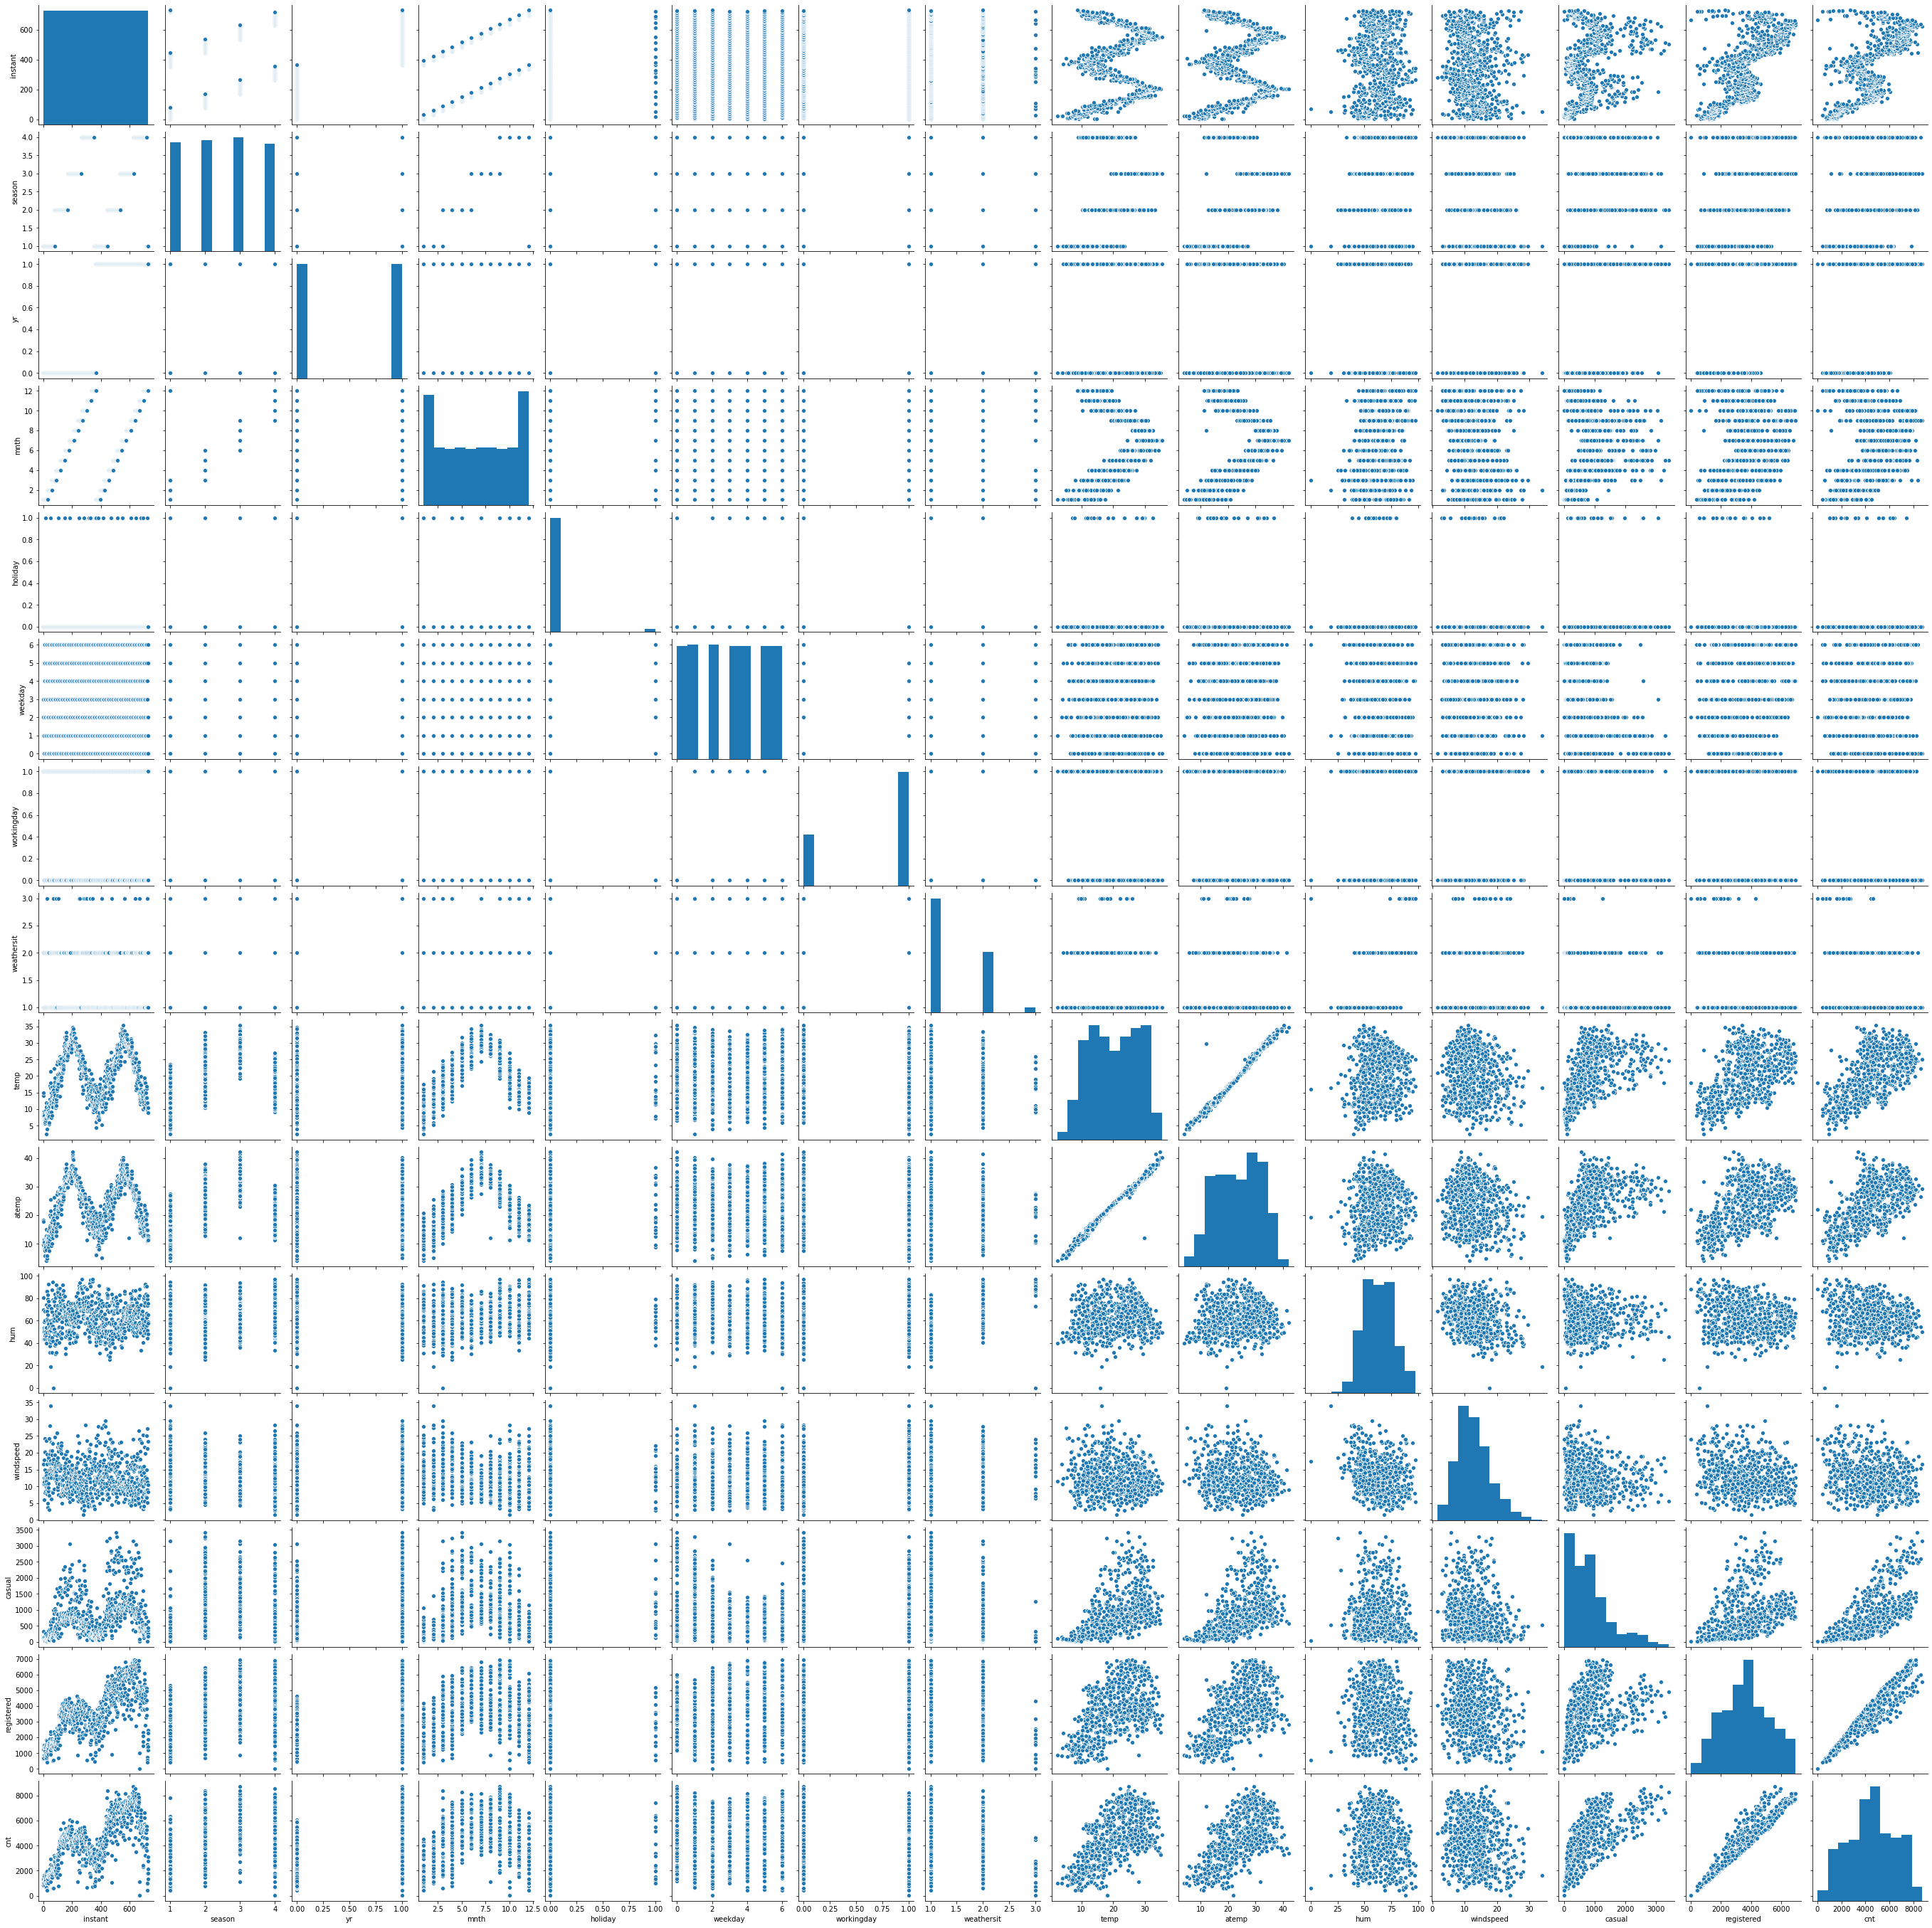

In [281]:
sns.pairplot(boom_bike)
plt.show()

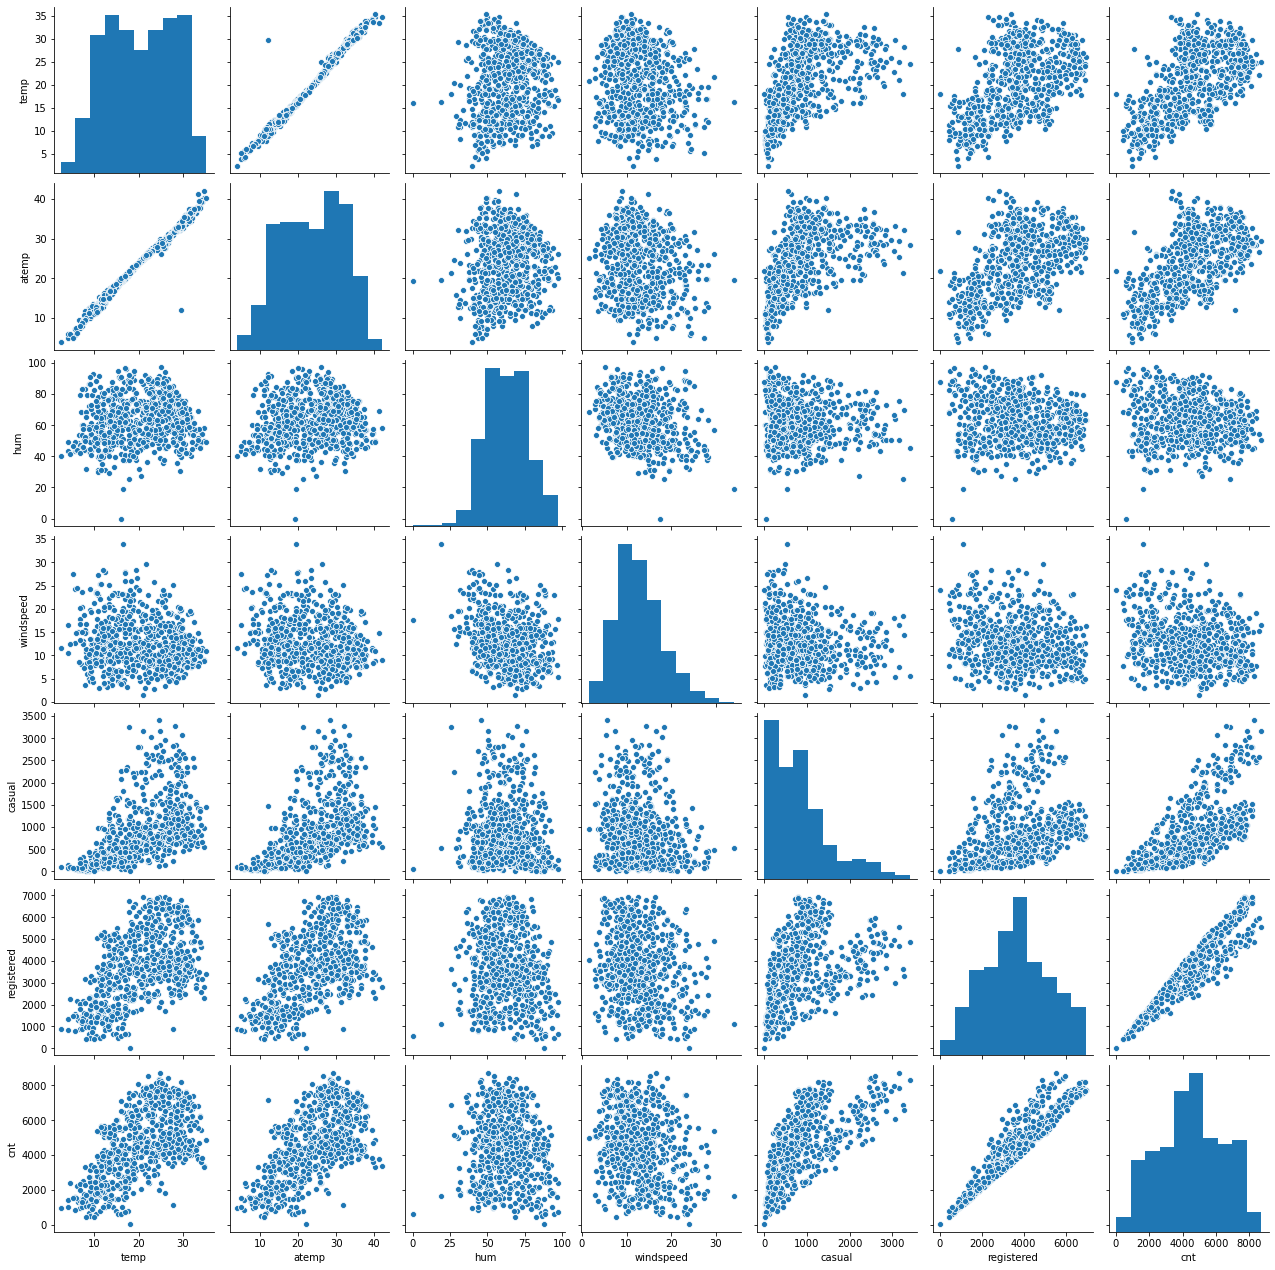

In [283]:
# its showing categorical variables too , let just separate only to numeric variables
varlist =  ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
sns.pairplot(boom_bike[varlist])
plt.show()

### Above pair plots shows the following multicollinearity
- registered, casual and cnt are highly correlated, registered and casual display the same behaviour as cnt so it can be ignored for further analysis
- atemp and temp are highly correlated and behave as redundant variables so atemp  can be ignored.
- As the temperature increases the number of users/ demand for bikes on rent will also increase

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [284]:
boom_bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [285]:
print(boom_bike['holiday'])
boom_bike.holiday.value_counts()

0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Name: holiday, Length: 730, dtype: int64


0    709
1     21
Name: holiday, dtype: int64

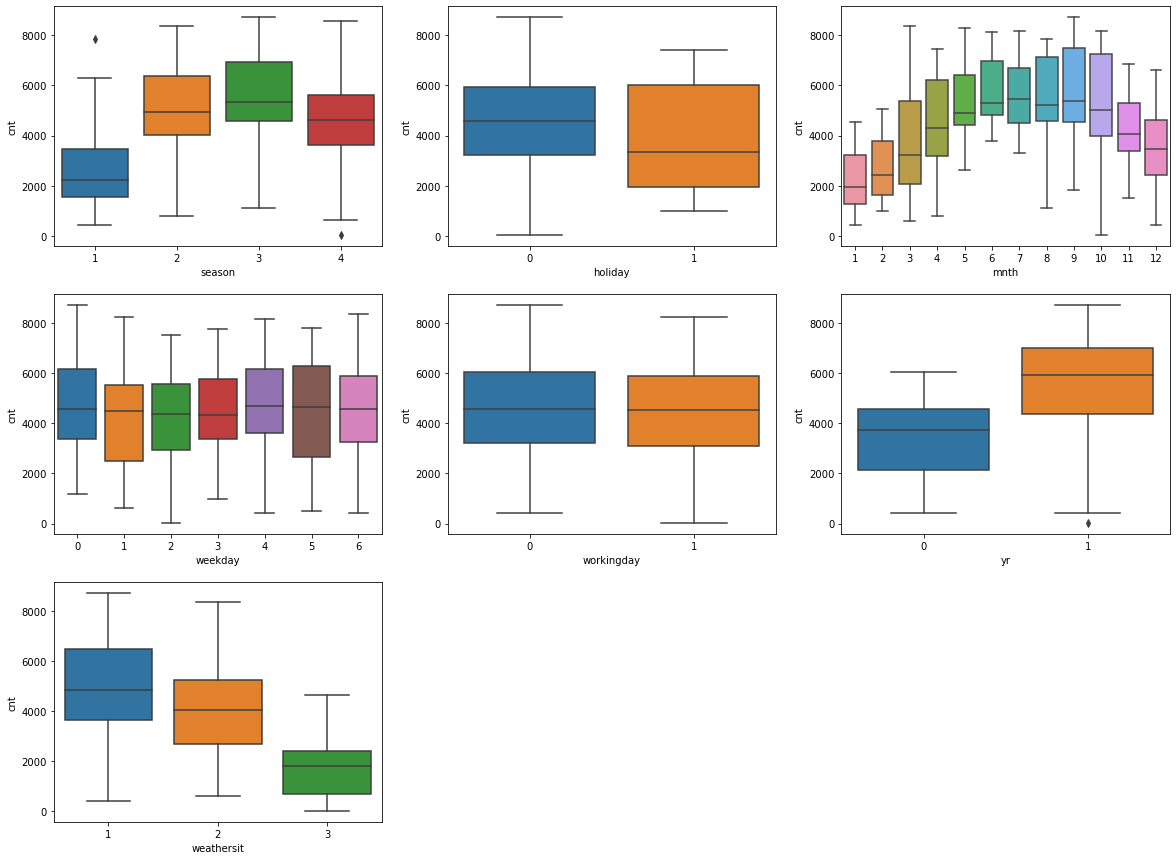

In [286]:
plt.figure(figsize=(20,15))
cat_var=['season','holiday','mnth','weekday', 'workingday', 'yr','weathersit']
for i in enumerate(cat_var):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x= i[1], y= 'cnt', data= boom_bike)

### Inference from above Visualization

- Out of all seasons, Demand is more during the Summer and Fall seasons
- Bike sharing count is more in month of June to october than other months.
- The day of week does not shows light or differentiate for the demand 
- in year 2019 the more bikes are on rent as compared to 2018 
- Weather situation also plays an important part for riding bikes and Bike sharing count is more when weathersit is Clear, Few clouds, Partly cloudy, Partly cloudy.

## Step 3: Data Preparation

### 3.1 Identify Categorical and Continuous variables

- Categorical Attributes : season , year , month , holiday , weekday , workingday , weathersit
- Continuous Attribute : temp , atemp , hum , windspeed , cnt
- no useful Attributes : 'instant','dteday','casual','registered'
- We will first drop unnecessary columns for the analysis
- we will impute missing values
- Create dummy variables for categorical variables
- Drop 'instant' as it is record index and index is serial number with no relation with cnt.
- Drop 'atemp' as it is redundant to 'temp', hence dropping atemp.
- Drop 'casual' and 'registered' as they are more like target variable.
- Drop 'dteday' as we already have column for month and year and dteday is always 1st of every month.

In [287]:
boom_bike.drop(['instant','dteday','casual', 'registered','atemp'], axis=1, inplace = True)
boom_bike.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

## Missing values

In [288]:
boom_bike.isnull().sum()
#Looks fine to go ahead

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64

## Dummy Variable
Covert all categorical columns to dummy variables

In [289]:
# Mapping the season function to its values
boom_bike['season'] = boom_bike['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
boom_bike.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0  spring   0     1        0        1           1           2  14.110847   
1  spring   0     1        0        2           1           2  14.902598   
2  spring   0     1        0        3           1           1   8.050924   
3  spring   0     1        0        4           1           1   8.200000   
4  spring   0     1        0        5           1           1   9.305237   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

In [290]:
# Mapping the Month function to its values
boom_bike['mnth'] = boom_bike['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: ' November', 12: 'December'})
boom_bike.head()

season  yr     mnth  holiday  weekday  workingday  weathersit       temp  \
0  spring   0  January        0        1           1           2  14.110847   
1  spring   0  January        0        2           1           2  14.902598   
2  spring   0  January        0        3           1           1   8.050924   
3  spring   0  January        0        4           1           1   8.200000   
4  spring   0  January        0        5           1           1   9.305237   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

In [291]:
# Mappng weather sit attributes to its values
boom_bike['weathersit'] = boom_bike['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light snow', 4: 'heavy rain'})
boom_bike.head()

season  yr     mnth  holiday  weekday  workingday weathersit       temp  \
0  spring   0  January        0        1           1       mist  14.110847   
1  spring   0  January        0        2           1       mist  14.902598   
2  spring   0  January        0        3           1      clear   8.050924   
3  spring   0  January        0        4           1      clear   8.200000   
4  spring   0  January        0        5           1      clear   9.305237   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

In [292]:
# Mapping weekday attributes to its values
boom_bike['weekday'] = bike['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
boom_bike.head()

season  yr     mnth  holiday    weekday  workingday weathersit       temp  \
0  spring   0  January        0     Monday           1       mist  14.110847   
1  spring   0  January        0    Tuesday           1       mist  14.902598   
2  spring   0  January        0  Wednesday           1      clear   8.050924   
3  spring   0  January        0   Thursday           1      clear   8.200000   
4  spring   0  January        0     Friday           1      clear   9.305237   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

In [293]:
boom_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [294]:
# Get the dummy variables for the feature 'weathersit','season','mnth' and store it in a 
#new variable - 'status_1','status_2','status_3',status_4
status_1= pd.get_dummies(boom_bike['season'])
status_2= pd.get_dummies(boom_bike['mnth'])
status_3= pd.get_dummies(boom_bike['weekday'])
status_4= pd.get_dummies(boom_bike['weathersit'])

In [295]:
status_1.head()

fall  spring  summer  winter
0     0       1       0       0
1     0       1       0       0
2     0       1       0       0
3     0       1       0       0
4     0       1       0       0

In [296]:
# Let's drop the first column from status_1 using 'drop_first = True'

status_1 = pd.get_dummies(boom_bike['season'], drop_first = True)
status_1

spring  summer  winter
0         1       0       0
1         1       0       0
2         1       0       0
3         1       0       0
4         1       0       0
..      ...     ...     ...
725       1       0       0
726       1       0       0
727       1       0       0
728       1       0       0
729       1       0       0

[730 rows x 3 columns]

In [297]:
status_2.head()

November  April  August  December  February  January  July  June  March  \
0          0      0       0         0         0        1     0     0      0   
1          0      0       0         0         0        1     0     0      0   
2          0      0       0         0         0        1     0     0      0   
3          0      0       0         0         0        1     0     0      0   
4          0      0       0         0         0        1     0     0      0   

   May  October  September  
0    0        0          0  
1    0        0          0  
2    0        0          0  
3    0        0          0  
4    0        0          0

In [298]:
# Let's drop the first column from status_2 using 'drop_first = True'

status_2 = pd.get_dummies(boom_bike['mnth'], drop_first = True)
status_2

April  August  December  February  January  July  June  March  May  \
0        0       0         0         0        1     0     0      0    0   
1        0       0         0         0        1     0     0      0    0   
2        0       0         0         0        1     0     0      0    0   
3        0       0         0         0        1     0     0      0    0   
4        0       0         0         0        1     0     0      0    0   
..     ...     ...       ...       ...      ...   ...   ...    ...  ...   
725      0       0         1         0        0     0     0      0    0   
726      0       0         1         0        0     0     0      0    0   
727      0       0         1         0        0     0     0      0    0   
728      0       0         1         0        0     0     0      0    0   
729      0       0         1         0        0     0     0      0    0   

     October  September  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0  
..       ...        ...  
725        0          0  
726        0          0  
727        0          0  
728        0          0  
729        0          0  

[730 rows x 11 columns]

In [299]:
status_3.head()

Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0       0       1         0       0         0        0          0
1       0       0         0       0         0        1          0
2       0       0         0       0         0        0          1
3       0       0         0       0         1        0          0
4       1       0         0       0         0        0          0

In [300]:
# Let's drop the first column from status_3 using 'drop_first = True'

status_3 = pd.get_dummies(boom_bike['weekday'], drop_first = True)
status_3

Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0         1         0       0         0        0          0
1         0         0       0         0        1          0
2         0         0       0         0        0          1
3         0         0       0         1        0          0
4         0         0       0         0        0          0
..      ...       ...     ...       ...      ...        ...
725       0         0       0         0        0          0
726       0         1       0         0        0          0
727       0         0       1         0        0          0
728       1         0       0         0        0          0
729       0         0       0         0        1          0

[730 rows x 6 columns]

In [301]:
status_4.head()

clear  light snow  mist
0      0           0     1
1      0           0     1
2      1           0     0
3      1           0     0
4      1           0     0

In [302]:
# Let's drop the first column from status_4 using 'drop_first = True'

status_4 = pd.get_dummies(boom_bike['weathersit'], drop_first = True)
status_4

light snow  mist
0             0     1
1             0     1
2             0     0
3             0     0
4             0     0
..          ...   ...
725           0     1
726           0     1
727           0     1
728           0     0
729           0     1

[730 rows x 2 columns]

In [303]:
# Add the results to the original boom_bike dataframe

boom_bike = pd.concat([boom_bike, status_1,status_2,status_3,status_4], axis = 1)

In [304]:
boom_bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'spring', 'summer',
       'winter', 'April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'October', 'September', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'light snow', 'mist'],
      dtype='object')

In [305]:
boom_bike.head(20)

season  yr     mnth  holiday    weekday  workingday weathersit       temp  \
0   spring   0  January        0     Monday           1       mist  14.110847   
1   spring   0  January        0    Tuesday           1       mist  14.902598   
2   spring   0  January        0  Wednesday           1      clear   8.050924   
3   spring   0  January        0   Thursday           1      clear   8.200000   
4   spring   0  January        0     Friday           1      clear   9.305237   
5   spring   0  January        0   Saturday           0      clear   8.378268   
6   spring   0  January        0     Sunday           0       mist   8.057402   
7   spring   0  January        0     Monday           1       mist   6.765000   
8   spring   0  January        0    Tuesday           1      clear   5.671653   
9   spring   0  January        0  Wednesday           1      clear   6.184153   
10  spring   0  January        0   Thursday           1       mist   6.932731   
11  spring   0  January        0     Friday           1      clear   7.081807   
12  spring   0  January        0   Saturday           0      clear   6.765000   
13  spring   0  January        0     Sunday           0      clear   6.595670   
14  spring   0  January        0     Monday           1       mist   9.566653   
15  spring   0  January        0    Tuesday           1      clear   9.498347   
16  spring   0  January        1  Wednesday           0       mist   7.209153   
17  spring   0  January        0   Thursday           1       mist   8.883347   
18  spring   0  January        0     Friday           1       mist  11.979134   
19  spring   0  January        0   Saturday           0       mist  10.728347   

        hum  windspeed   cnt  spring  summer  winter  April  August  December  \
0   80.5833  10.749882   985       1       0       0      0       0         0   
1   69.6087  16.652113   801       1       0       0      0       0         0   
2   43.7273  16.636703  1349       1       0       0      0       0         0   
3   59.0435  10.739832  1562       1       0       0      0       0         0   
4   43.6957  12.522300  1600       1       0       0      0       0         0   
5   51.8261   6.000868  1606       1       0       0      0       0         0   
6   49.8696  11.304642  1510       1       0       0      0       0         0   
7   53.5833  17.875868   959       1       0       0      0       0         0   
8   43.4167  24.250650   822       1       0       0      0       0         0   
9   48.2917  14.958889  1321       1       0       0      0       0         0   
10  68.6364   8.182844  1263       1       0       0      0       0         0   
11  59.9545  20.410009  1162       1       0       0      0       0         0   
12  47.0417  20.167000  1406       1       0       0      0       0         0   
13  53.7826   8.478716  1421       1       0       0      0       0         0   
14  49.8750  10.583521  1248       1       0       0      0       0         0   
15  48.3750  12.625011  1204       1       0       0      0       0         0   
16  53.7500  12.999139  1000       1       0       0      0       0         0   
17  86.1667   9.833925   683       1       0       0      0       0         0   
18  74.1739  13.957239  1650       1       0       0      0       0         0   
19  53.8333  13.125568  1927       1       0       0      0       0         0   

    February  January  July  June  March  May  October  September  Monday  \
0          0        1     0     0      0    0        0          0       1   
1          0        1     0     0      0    0        0          0       0   
2          0        1     0     0      0    0        0          0       0   
3          0        1     0     0      0    0        0          0       0   
4          0        1     0     0      0    0        0          0       0   
5          0        1     0     0      0    0        0          0       0   
6          0        1     0     0      0    0        0       

In [306]:
boom_bike.shape

(730, 33)

In [307]:
# Drop 'weathersit', 'mnth', 'weekday', 'season' as we have created the dummies for it

boom_bike.drop(['weathersit', 'mnth', 'weekday', 'season'], axis = 1, inplace = True)

In [308]:
boom_bike.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  spring  \
0   0        0           1  14.110847  80.5833  10.749882   985       1   
1   0        0           1  14.902598  69.6087  16.652113   801       1   
2   0        0           1   8.050924  43.7273  16.636703  1349       1   
3   0        0           1   8.200000  59.0435  10.739832  1562       1   
4   0        0           1   9.305237  43.6957  12.522300  1600       1   

   summer  winter  April  August  December  February  January  July  June  \
0       0       0      0       0         0         0        1     0     0   
1       0       0      0       0         0         0        1     0     0   
2       0       0      0       0         0         0        1     0     0   
3       0       0      0       0         0         0        1     0     0   
4       0       0      0       0         0         0        1     0     0   

   March  May  October  September  Monday  Saturday  Sunday  Thursday  \
0      0    0        0          0       1         0       0         0   
1      0    0        0          0       0         0       0         0   
2      0    0        0          0       0         0       0         0   
3      0    0        0          0       0         0       0         1   
4      0    0        0          0       0         0       0         0   

   Tuesday  Wednesday  light snow  mist  
0        0          0           0     1  
1        1          0           0     1  
2        0          1           0     0  
3        0          0           0     0  
4        0          0           0     0

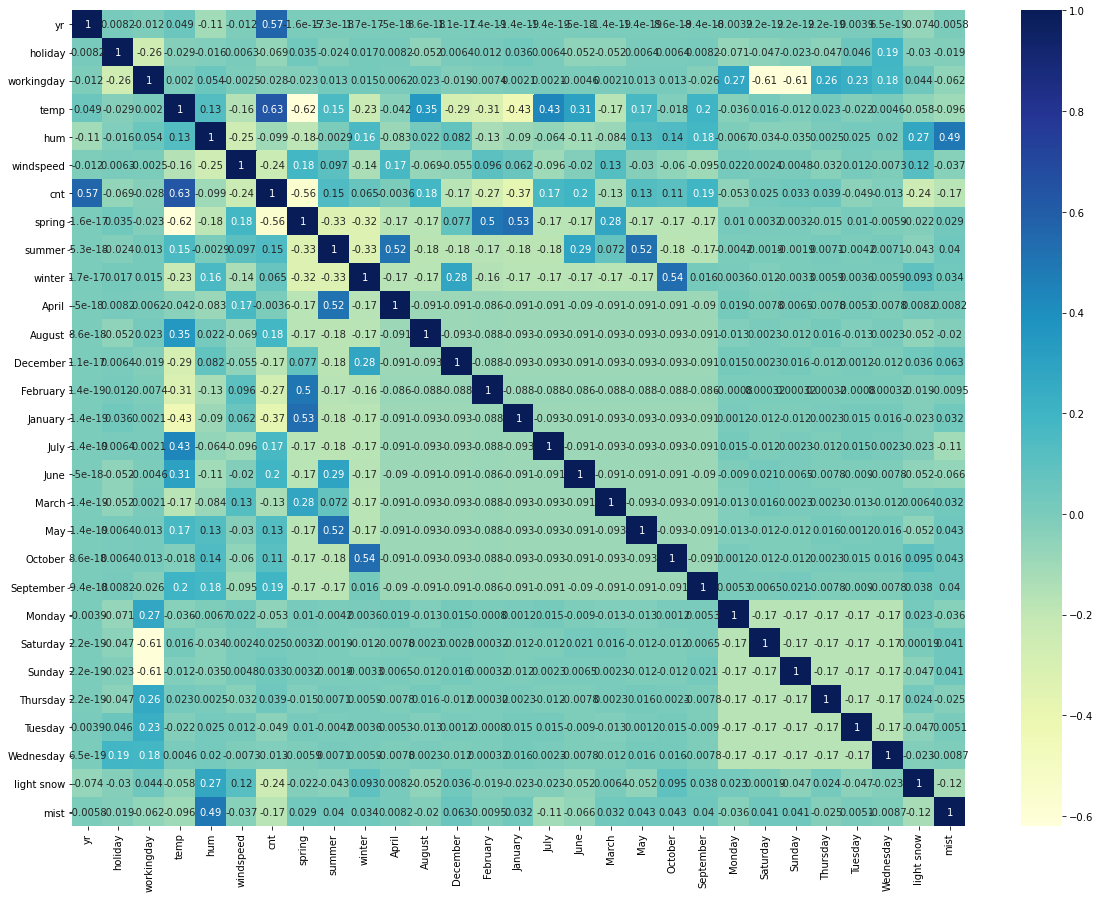

In [309]:
plt.figure(figsize=(20,15))
sns.heatmap(boom_bike.corr(), cmap="YlGnBu", annot= True)
plt.show()

## Step 4 Splitting the Data into Training and Testing Sets

In [310]:
# # We specify this so that the train and test data set always have the same rows, respectively
import sklearn
from sklearn.model_selection import train_test_split

In [311]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(boom_bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [312]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


### Rescaling the Features 

1. Min-Max scaling (Normalization): Between 0 and 1
2. Standardisation (mean-0, sigma-1)



In [313]:
#x
# normalization: (x - xmin)/(xmax - xmin)
# standardisation: (x- mu)/sigma
from sklearn.preprocessing import MinMaxScaler

In [314]:
# Instantiate an object
scaler = MinMaxScaler()

In [315]:
# Apply scaler() to all the columns except  'dummy' variables
# fit() : learn xmin,xmax
# transform(): x-xmin/xmax - xmin
# fit_transform()
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [316]:
df_train.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  spring  \
653   1        0           1  0.509887  0.575354   0.300794  0.864243       0   
576   1        0           1  0.815169  0.725633   0.264686  0.827658       0   
426   1        0           0  0.442393  0.640189   0.255342  0.465255       1   
728   1        0           1  0.245101  0.498067   0.663106  0.204096       1   
482   1        0           0  0.395666  0.504508   0.188475  0.482973       0   

     summer  winter  April  August  December  February  January  July  June  \
653       0       1      0       0         0         0        0     0     0   
576       0       0      0       0         0         0        0     1     0   
426       0       0      0       0         0         0        0     0     0   
728       0       0      0       0         1         0        0     0     0   
482       1       0      1       0         0         0        0     0     0   

     March  May  October  September  Monday  Saturday  Sunday  Thursday  \
653      0    0        1          0       0         0       0         0   
576      0    0        0          0       0         0       0         0   
426      1    0        0          0       0         0       1         0   
728      0    0        0          0       1         0       0         0   
482      0    0        0          0       0         0       1         0   

     Tuesday  Wednesday  light snow  mist  
653        0          1           0     0  
576        0          1           0     0  
426        0          0           0     1  
728        0          0           0     0  
482        0          0           0     1

In [317]:
df_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.537262    0.650369    0.320768   
std      0.500429    0.157763    0.453386    0.225844    0.145882    0.169797   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.538643    0.199179   
50%      1.000000    0.000000    1.000000    0.540519    0.653714    0.296763   
75%      1.000000    0.000000    1.000000    0.735215    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt      spring      summer     winter       April      August  \
count  510.000000  510.000000  510.000000  510.00000  510.000000  510.000000   
mean     0.513620    0.243137    0.245098    0.24902    0.078431    0.096078   
std      0.224593    0.429398    0.430568    0.43287    0.269113    0.294988   
min      0.000000    0.000000    0.000000    0.00000    0.000000    0.000000   
25%      0.356420    0.000000    0.000000    0.00000    0.000000    0.000000   
50%      0.518638    0.000000    0.000000    0.00000    0.000000    0.000000   
75%      0.684710    0.000000    0.000000    0.00000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.00000    1.000000    1.000000   

         December    February     January        July        June       March  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.084314    0.066667    0.088235    0.076471    0.074510    0.098039   
std      0.278131    0.249689    0.283915    0.266010    0.262857    0.297660   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              May     October   September      Monday    Saturday      Sunday  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.084314    0.086275    0.080392    0.154902    0.129412    0.137255   
std      0.278131    0.281045    0.272166    0.362166    0.335985    0.344454   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         Thursday     Tuesday   Wednesday  light snow        mist  
count  510.000000  510.000000  510.000000  510.000000  510.000000  
mean     0.143137    0.152941    0.135294    0.029412    0.343137  
std      0.350557    0.360284    0.342373    0.169124    0.475223  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000

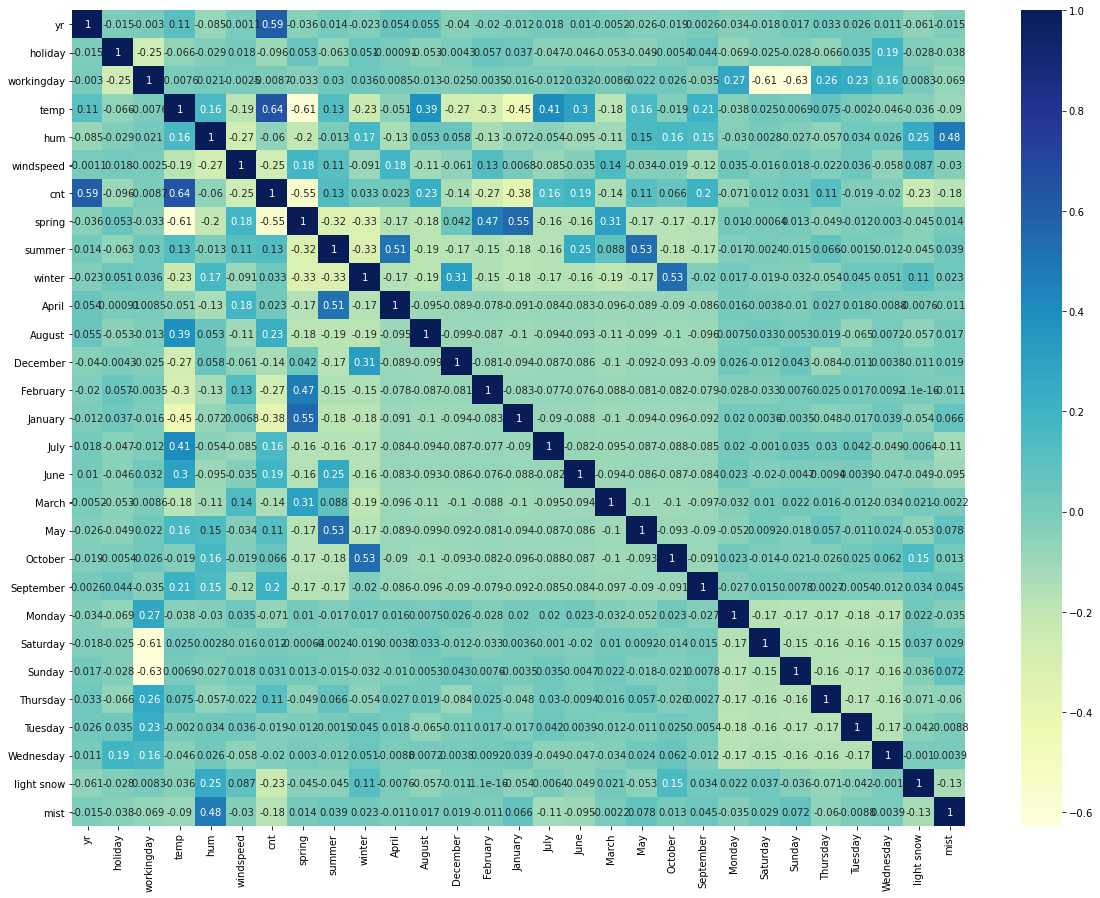

In [318]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 15))

sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

`yr`,`temp` are highly correlated to  `cnt`. Let's see a scatter plot for them.

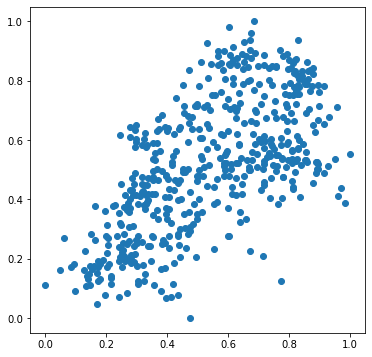

In [319]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [320]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model

### 4.1 Using Mixed approach for buliding  Linear Regression model 

To create a good model we need to select the optimum and best features.
Feature selection can be done using 3 ways :
1. Automatic -- RFE (Recursive Feature Elimination) 
2. Manual -- VIF (Variance Inflation Factor) and p-value -- manually go through the various variables and eliminate variables which have a high p value / VIF
##### We could have :
    - high p-value, high VIF
    - High-low:
        - High p-value, low VIF :always remove this type of variables first
        - low p-value, High VIF : remove this type of variables latter i.e. after the ones above.
    - low p-value, low VIF
3. Mixed -- Automatic + Manual -- mixed approach of automatic (RFC) to reduce the number of variables and manual (p-value+VIF) enabling to build a good model

##### Mixed approach is considered for the below model building task

### RFE
Recursive feature elimination

In [321]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [322]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [323]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('April', False, 2),
 ('August', True, 1),
 ('December', False, 13),
 ('February', False, 12),
 ('January', False, 7),
 ('July', False, 11),
 ('June', False, 3),
 ('March', True, 1),
 ('May', True, 1),
 ('October', True, 1),
 ('September', True, 1),
 ('Monday', False, 9),
 ('Saturday', False, 5),
 ('Sunday', False, 6),
 ('Thursday', False, 14),
 ('Tuesday', False, 8),
 ('Wednesday', False, 10),
 ('light snow', True, 1),
 ('mist', True, 1)]

In [324]:
# Columns that we will be finaly considering in modelling
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'August', 'March', 'May', 'October', 'September',
       'light snow', 'mist'],
      dtype='object')

In [325]:
# columns that can be ignored for modelling
X_train.columns[~rfe.support_]

Index(['workingday', 'April', 'December', 'February', 'January', 'July',
       'June', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [326]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [327]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [328]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [329]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          2.95e-189
Time:                        18:29:32   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2812      0.036      7.826      0.0

In [330]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'August', 'March', 'May', 'October', 'September',
       'light snow', 'mist'],
      dtype='object')

In [331]:
# may is insignificant in presence of other variables
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0        const  82.01
6       spring   6.17
8       winter   4.81
7       summer   3.85
3         temp   3.84
4          hum   1.94
9       August   1.68
11         May   1.56
15        mist   1.56
12     October   1.52
13   September   1.40
14  light snow   1.26
10       March   1.21
5    windspeed   1.20
1           yr   1.04
2      holiday   1.02

- high p-value, high VIF
    - High-low:
        - High p-value, low VIF :always remove this type of variables first
        - low p-value, High VIF : remove this type of variables latter i.e. after the ones above.
    - low p-value, low VIF

### Dropping the Variable and Updating the Model


In [332]:
# High p-value, low VIF is of May and high p-value so lets drop this variable first
X_train_new = X_train_rfe.drop(["May"], axis =1)

In [333]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          9.02e-190
Time:                        18:32:21   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2687      0.035      7.622      0.0

In [334]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'August', 'March', 'October', 'September',
       'light snow', 'mist'],
      dtype='object')

In [335]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0        const  78.66
6       spring   5.97
8       winter   4.75
3         temp   3.72
7       summer   3.13
4          hum   1.91
9       August   1.68
14        mist   1.56
11     October   1.52
12   September   1.40
13  light snow   1.26
5    windspeed   1.20
10       March   1.17
1           yr   1.03
2      holiday   1.02

In [336]:
# high p-value high vIF
X_train_new = X_train_new.drop(["spring"], axis =1)

In [337]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'August', 'March', 'October', 'September', 'light snow',
       'mist'],
      dtype='object')

In [338]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          2.26e-190
Time:                        18:33:25   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2324      0.027      8.529      0.0

In [339]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0        const  46.84
4          hum   1.87
7       winter   1.79
3         temp   1.62
13        mist   1.56
10     October   1.49
8       August   1.46
6       summer   1.38
11   September   1.25
12  light snow   1.24
5    windspeed   1.19
9        March   1.12
1           yr   1.03
2      holiday   1.02

In [340]:
# March has high p-value and low VIF
X_train_new = X_train_new.drop(["March"], axis =1)

In [341]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'August', 'October', 'September', 'light snow', 'mist'],
      dtype='object')

In [342]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          6.02e-191
Time:                        18:35:05   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2390      0.027      8.848      0.0

In [343]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0        const  45.87
4          hum   1.87
7       winter   1.72
3         temp   1.59
12        mist   1.56
9      October   1.49
8       August   1.45
6       summer   1.38
10   September   1.24
11  light snow   1.24
5    windspeed   1.18
1           yr   1.03
2      holiday   1.02

In [344]:
# Above model looks statistically significant as we can see
# All the p-values are less than 0.05 or 0 except october which is 0.02 
# low vif except const
# We can leave it here and go ahead with residual analyis just by dropping const because high VIF 
# or lets drop october then const
# lets observe what it does to our model
X_train_new = X_train_new.drop(["October"], axis =1)

In [345]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'August', 'September', 'light snow', 'mist'],
      dtype='object')

In [346]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.1
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          4.43e-191
Time:                        18:36:01   Log-Likelihood:                 508.01
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     498   BIC:                            -941.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2317      0.027      8.607      0.0

In [347]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0        const  45.18
4          hum   1.86
11        mist   1.56
3         temp   1.54
8       August   1.44
6       summer   1.37
7       winter   1.32
10  light snow   1.23
9    September   1.21
5    windspeed   1.18
1           yr   1.03
2      holiday   1.02

In [348]:
X_train_new = X_train_new.drop(["August"], axis =1)

In [349]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.6
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          7.80e-190
Time:                        18:36:20   Log-Likelihood:                 502.18
No. Observations:                 510   AIC:                            -982.4
Df Residuals:                     499   BIC:                            -935.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2256      0.027      8.314      0.0

In [350]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0        const  44.99
4          hum   1.86
10        mist   1.55
3         temp   1.27
7       winter   1.25
9   light snow   1.23
6       summer   1.19
5    windspeed   1.18
8    September   1.11
1           yr   1.03
2      holiday   1.02

- We have p-value less than 0.05 or in our case 0 and vif less than 3 which proves that the model is statistically significant
- We have r2 more than 83 percent
- const 44.9 can be ignored as it doesn't contributes much to the statistical significance
- Anyways lets drop it and see what happens

In [351]:
# lets drop const and see what it does to our model
X_train_new = X_train_new.drop(['const'], axis=1)

In [352]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3         hum  14.27
2        temp   8.00
4   windspeed   3.55
9        mist   2.11
0          yr   2.01
6      winter   1.66
5      summer   1.58
7   September   1.21
8  light snow   1.16
1     holiday   1.04

In [354]:
# Our vif remains to be more less than 5 however two attributes hum and temp have high vif
# however, we won't drop it bacause the affect is just because of constant
# we will land up in the never ending loop
# LETS PROCEED FURTHER

In [355]:
X_tarin_corr=pd.concat([X_train_new,y_train], axis=1)

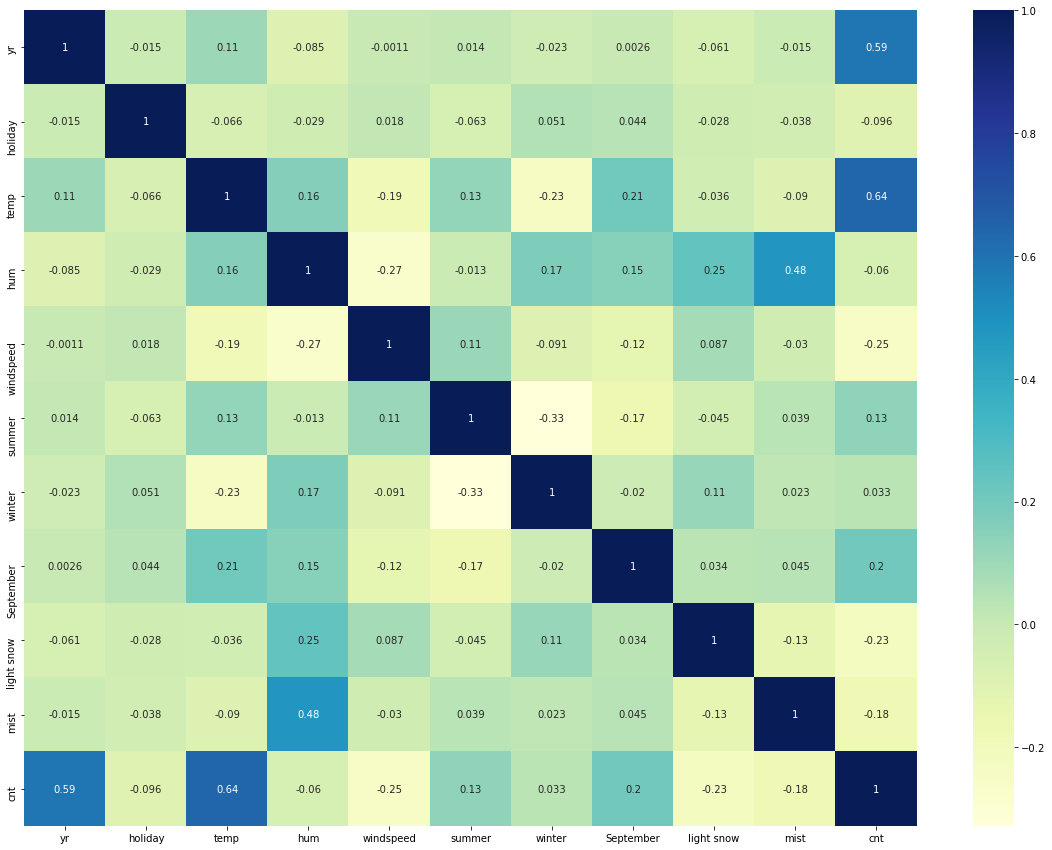

In [357]:
plt.figure(figsize=(20,15))
sns.heatmap(X_tarin_corr.corr(), annot= True, cmap="YlGnBu")
plt.show()

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like

### Normal distribution of error terms: 
One of the assumption in linear regression is that the error(residuals) follow a normal distribution. So lets see if it follow normal distribution

In [358]:
y_train_cnt = lm.predict(X_train_lm)

In [359]:
%matplotlib inline

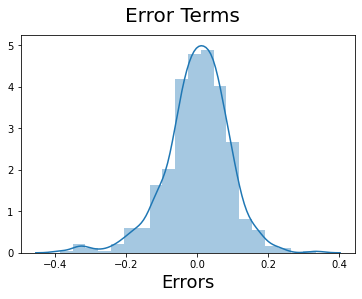

In [360]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    # X-label
plt.show()

- #### The above normally distributed histogram with mean = 0 ,proves that the  assumption of error terms is correct 

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [361]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [362]:
y_test = df_test.pop('cnt')
X_test = df_test

In [363]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [364]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [365]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=y_pred)

0.8046410496371389

## Model Evaluation

Text(0, 0.5, 'y_pred')

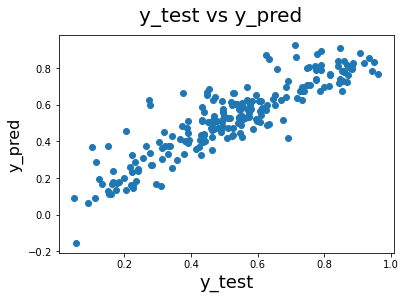

In [366]:
# Let's now plot the graph for actual versus predicted values.
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## Looking for patterns in the residuals
- Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the features and the target) is the same across all values of the independent variables. A scatter plot of residual values vs predicted values is a goodway to check for homoscedasticity

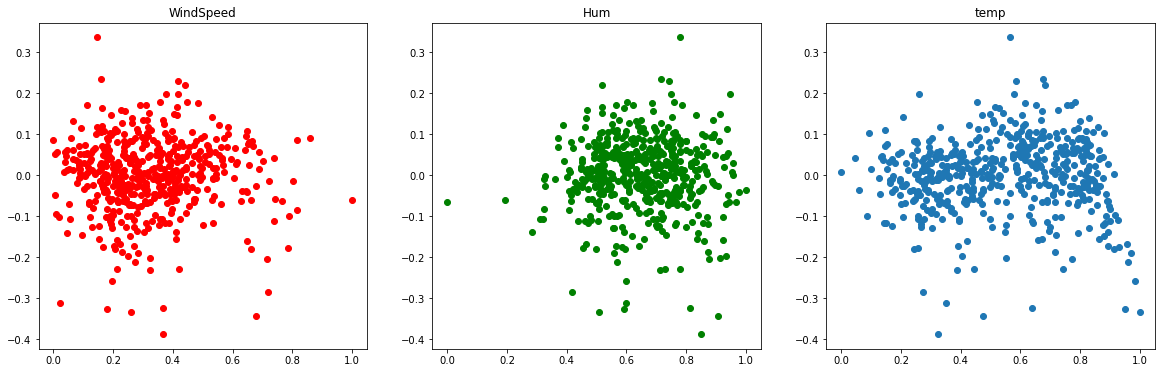

In [367]:
res = (y_train - y_train_cnt)
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.title('WindSpeed')
plt.scatter(X_train_new.windspeed, res, color = 'red')
plt.subplot(1, 3, 2)
plt.title('Hum')
plt.scatter(X_train_new.hum, res, color = 'green')
plt.subplot(1, 3, 3)
plt.title('temp')
plt.scatter(X_train_new.temp, res)
plt.show()

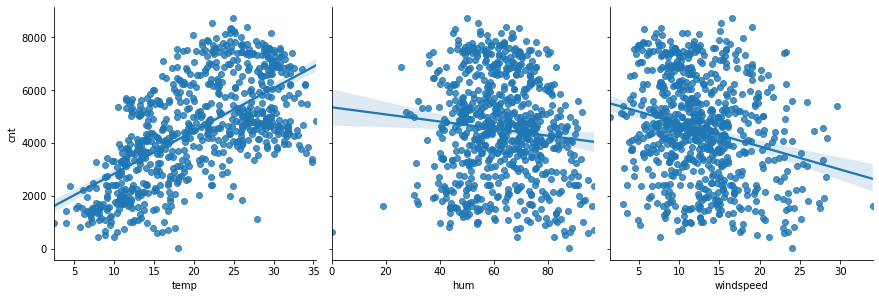

In [368]:
sns.pairplot(boom_bike, x_vars=['temp', 'hum', 'windspeed'], y_vars='cnt',size=4, aspect=1, kind='reg',)
plt.show()

In [369]:
# Above plot show that  there is a linear relationship between ‘cnt’ and independent variables 

- The heatmap shows the temp and yr variable are highly correlated with the target variable
- So, after covid temperature should be the main point of concern to make the app working
- Moreover, summer and september seems to be great for bike riding and increase the sales


## Homoscedasticity

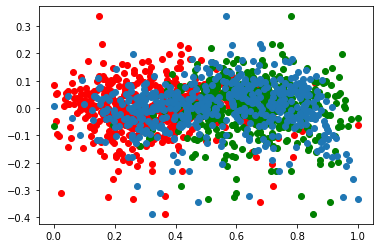

In [371]:
res = (y_train - y_train_cnt)
plt.scatter(X_train_new.windspeed, res, color = 'red')
plt.scatter(X_train_new.hum, res, color = 'green')
plt.scatter(X_train_new.temp, res)
plt.show()

We can see that the equation of our best fitted line is:

$ cnt = 0.226 + 0.229  \times  yr - 0.0980  \times  holiday + 0.571 \times  temp - 0.174 \times  hum - 0.187 \times  windspeed + 0.0895  \times  summer + 0.1402  \times winter + 0.1067  \times  September - 0.2367  \times  light snow - 0.0518  \times  mist  $

-  R square for Train model = 0.838 = 83.8 %
-  Adjusted R square for Test model = 0.8046 = 80.5 %
- if temp increase by 1 unit the cnt increase by 0.571 units
- Overall a good model however we can add more features